In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import glob

In [133]:
def load_files(veh_typ, wind):
    df_hist = pd.DataFrame()
    df_samp = pd.DataFrame()
    
    if wind:
        file_list = (glob.glob("results/results_wind/*"))
    else:
        file_list = (glob.glob("results/results_nowind/*"))

    for f in file_list:
        if len(f.split("/")[-1].split('.')[0].split('_')) < 4:
            continue
        _, data_type, vehicle_type, cat = f.split("/")[-1].split('.')[0].split('_')
        if vehicle_type != veh_typ:
            continue
        df = pd.read_csv(f)
        df.columns.values[0] = cat
        

        if data_type == "history":
            df_hist = pd.concat([df_hist, df], axis=1)
        elif data_type == "sampled":
            df_samp = pd.concat([df_samp, df], axis=1)
            
    df_hist['time'] = df_hist.index
    df_samp['time'] = df_samp.index
            
    return df_hist, df_samp

In [134]:
df_hist, df_samp = load_files("cars", wind=True)

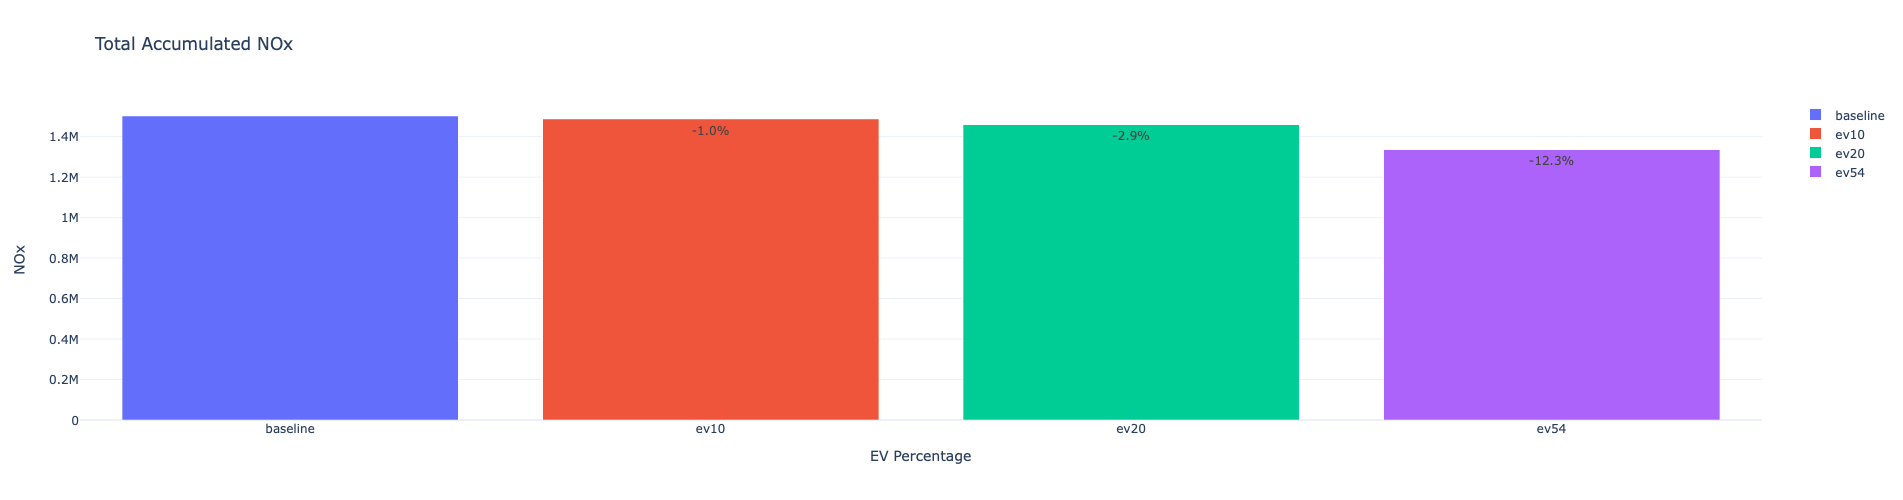

In [136]:
percentages = ["0","-1.0%", "-2.9%", "-12.3%"]

fig = go.Figure()
for idx, col in enumerate(["baseline", "ev10", "ev20", "ev54"]):
    if idx != 0:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col,text=percentages[idx]))
    else:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col))
fig.update_layout(template="plotly_white", title="Total Accumulated NOx", width=500, height=500)
fig.update_xaxes(title_text="EV Percentage")
fig.update_yaxes(title_text="NOx")
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




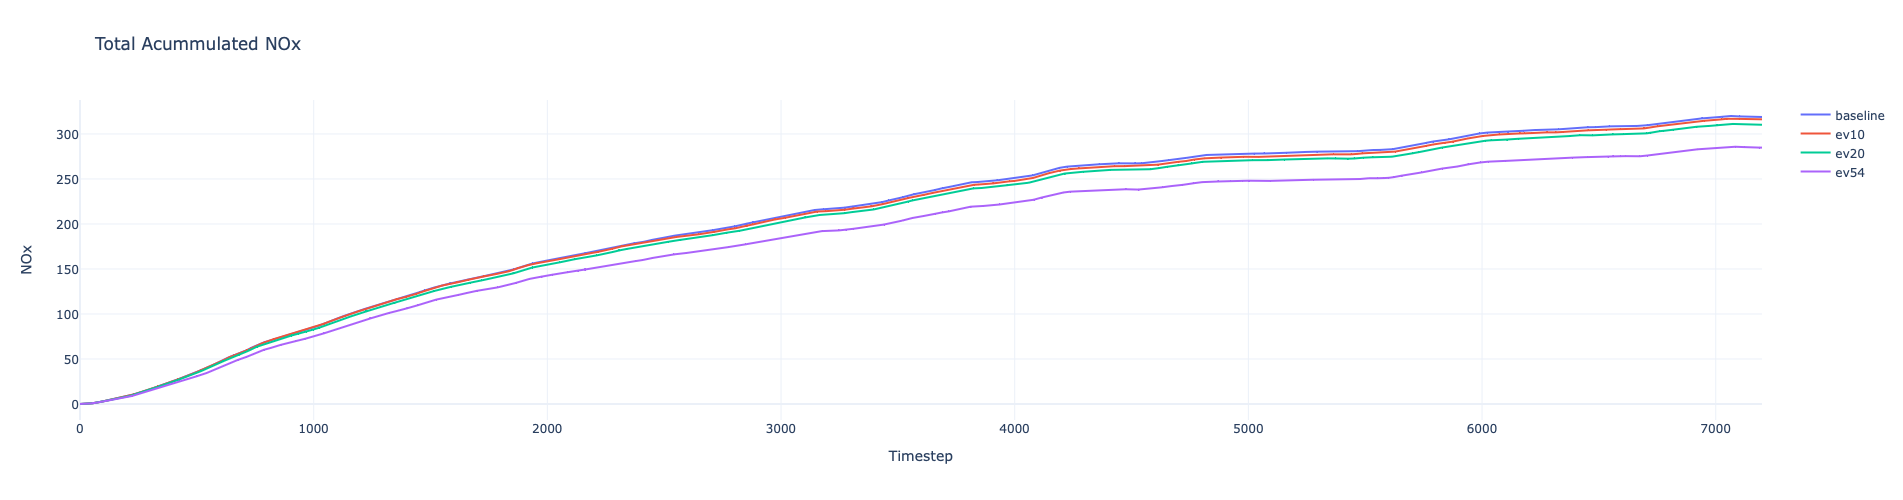

In [138]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20", "ev54"]:
    fig.add_trace(go.Line(x=df_hist['time'], y=df_hist[col], name=col))
fig.update_layout(title="Total Acummulated NOx", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NOx")

fig.show()

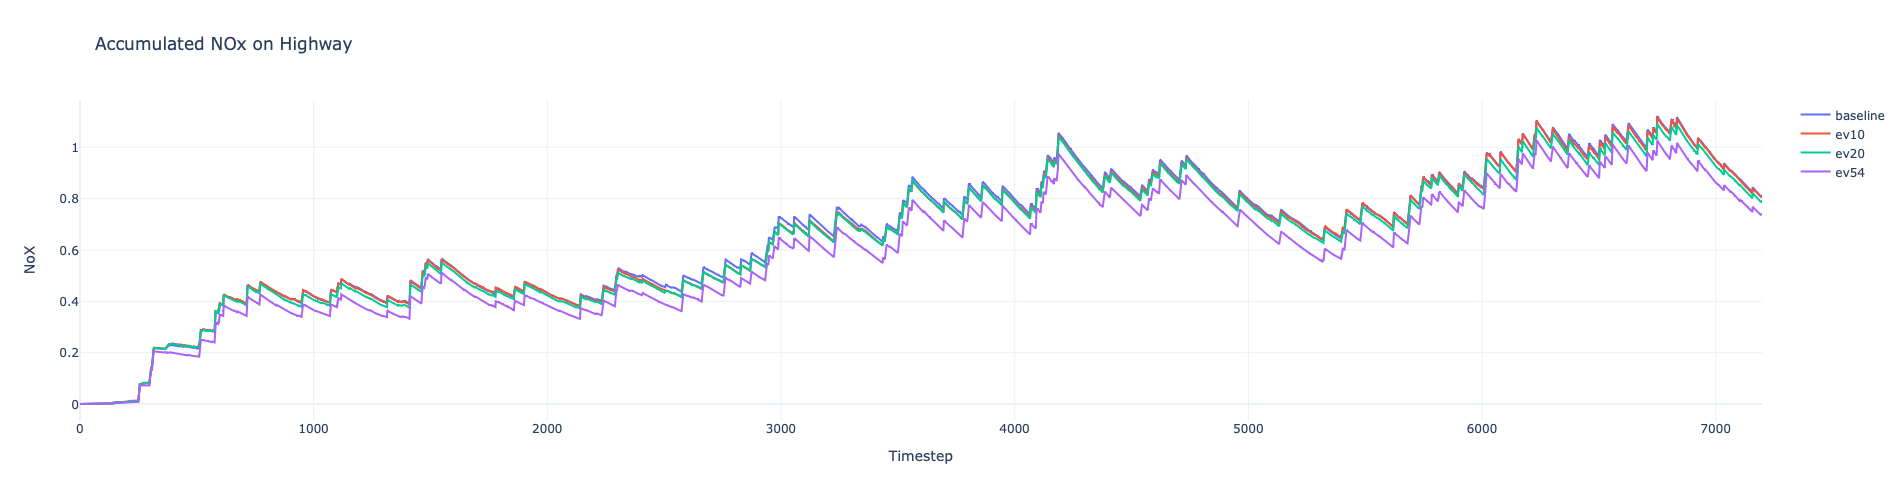

In [140]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20", "ev54"]:
    fig.add_trace(go.Line(x=df_samp['time'], y=df_samp[col], name=col))
    
fig.update_layout(title="Accumulated NOx on Highway", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NoX")
fig.show()

# Trucks

In [125]:
df_hist, df_samp = load_files("trucks", wind=True)

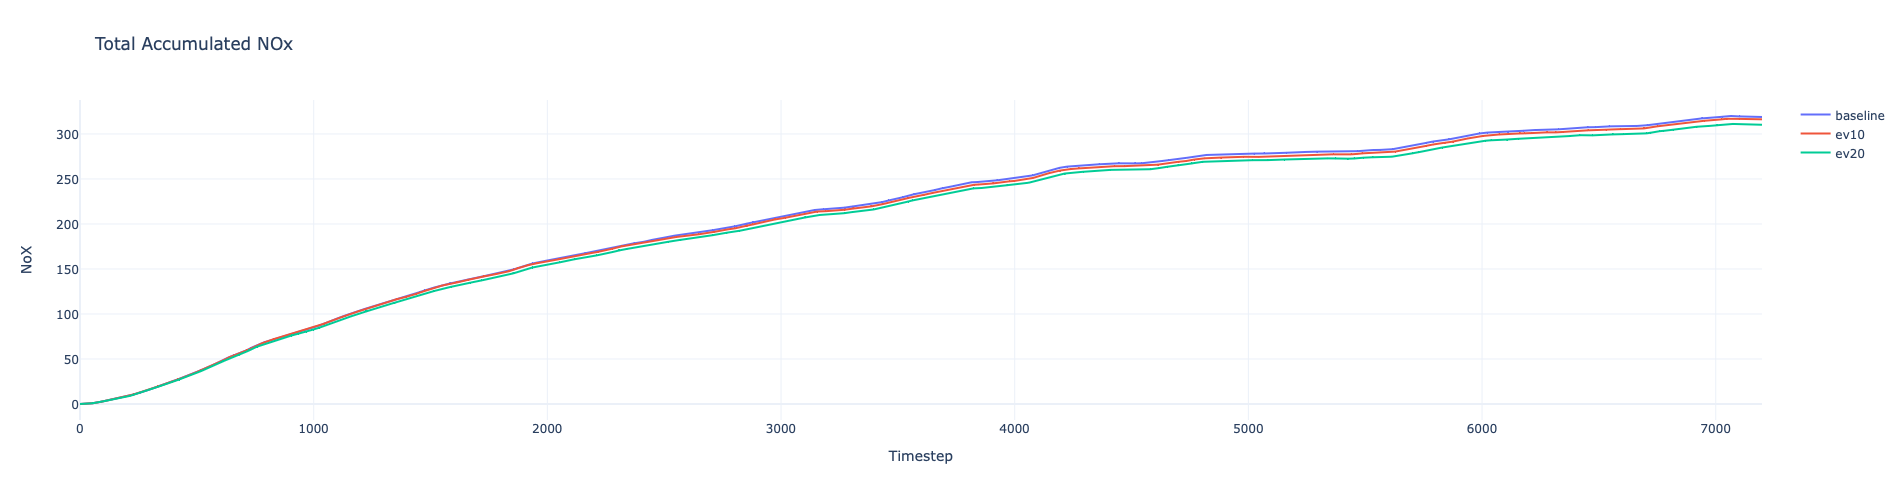

In [141]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20"]:
    fig.add_trace(go.Line(x=df_hist['time'], y=df_hist[col], name=col))
fig.update_layout(title="Total Accumulated NOx", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NoX")
fig.show()

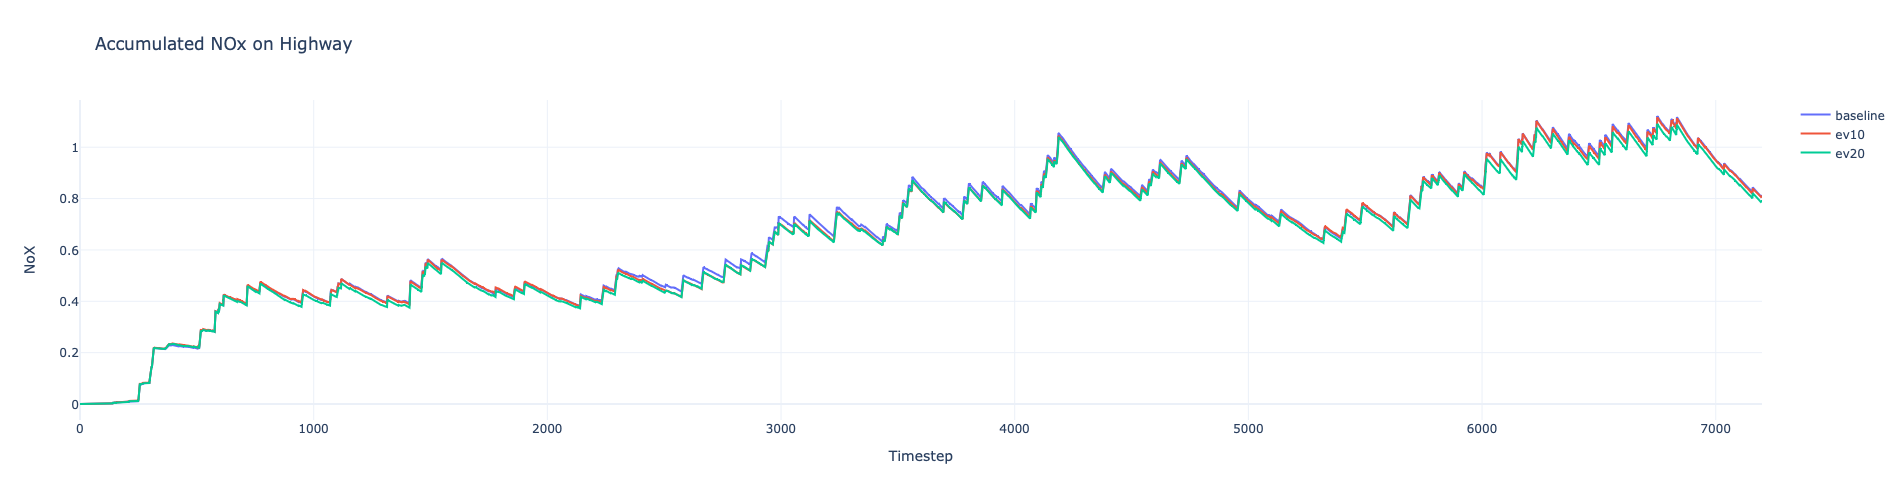

In [142]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20"]:
    fig.add_trace(go.Line(x=df_samp['time'], y=df_samp[col], name=col))
fig.update_layout(title="Accumulated NOx on Highway", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NoX")
fig.show()

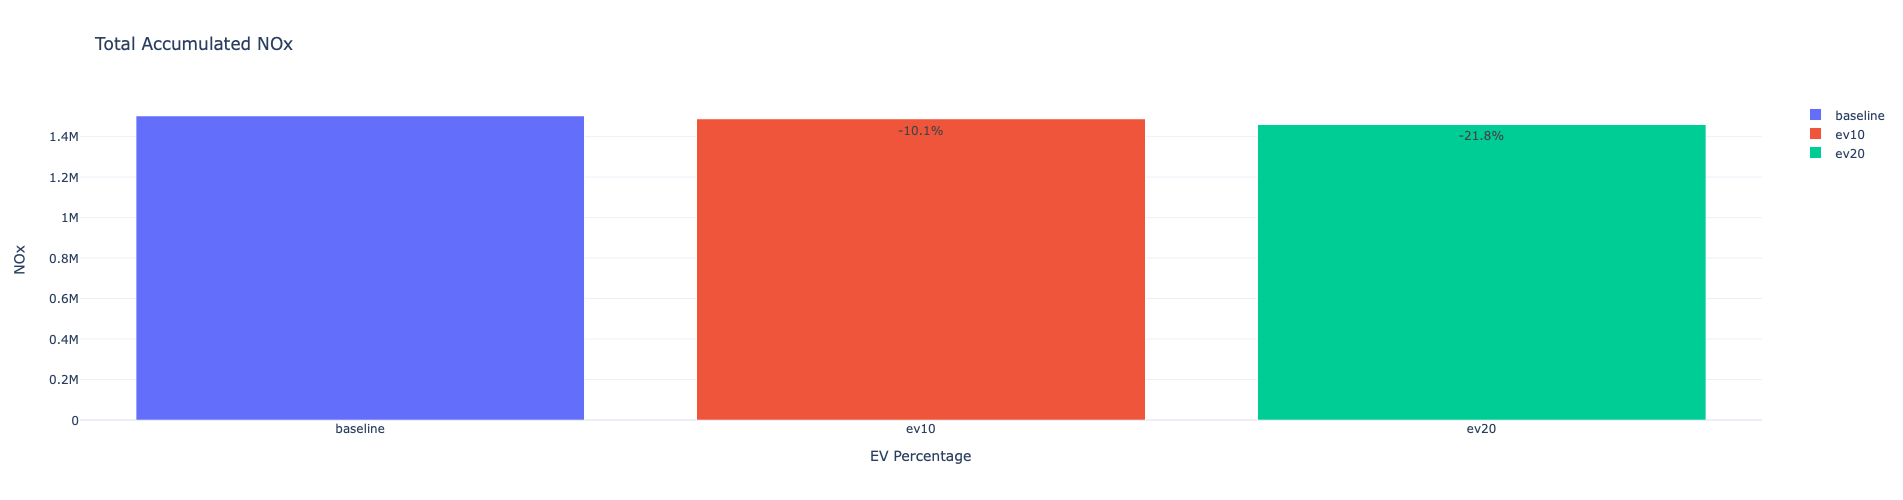

In [143]:
percentages = ["0","-10.1%", "-21.8%"]

fig = go.Figure()
for idx, col in enumerate(["baseline", "ev10", "ev20"]):
    if idx != 0:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col,text=percentages[idx]))
    else:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col))
fig.update_layout(title="Total Accumulated NOx",template="plotly_white", width=500, height=500)
fig.update_xaxes(title_text="EV Percentage")
fig.update_yaxes(title_text="NOx")
fig.show()